In [ ]:
import numpy as np

In [ ]:
class Node():
  def __init__(self, best_feat= None, best_thresh = None, left = None, right= None, value = None):
    self.best_feat = best_feat
    self.best_thresh = best_thresh
    self.left = left
    self.right = right
    self.value = value

  def is_leaf(self):
    return self.value != None

In [ ]:
class DecisionTree():
  def __init__(self, max_depth = 100, min_sample_split = 2, n_feats = None):
    self.max_depth = max_depth
    self.min_sample_split = min_sample_split
    self.n_feats = n_feats
    self.root = None

  def fit(self,X,y):
    self.n_feats = X.shape[1] if not self.n_feats else min(self.n_feats, X.shape[1])
    print(self.n_feats)
    self.root = self._grow_tree(X,y)

  def _grow_tree(self, X,y,depth = 0):
    n_samples, n_features = X.shape
    if (
        depth >= self.max_depth
        or n_samples < self.min_sample_split
    ):
      leaf_value = np.mean(y)
      return Node(value = leaf_value)

    feat_idxs = np.random.choice(n_features, self.n_feats, replace = False)
    print(feat_idxs)
    # feat_idxs = np.array(range(n_features))

    # greedily select the best split accordingly to maximum rss reduction
    best_feat, best_thresh = self._best_criteria(X,y, feat_idxs)

    #grow the children:
    left_idxs, right_idxs = self._split(X[:,best_feat], best_thresh)
    left = self._grow_tree(X[left_idxs, :], y[left_idxs], depth + 1)
    right = self._grow_tree(X[right_idxs, :], y[right_idxs], depth + 1)

    return Node(best_feat, best_thresh, left, right)


  def _best_criteria(self, X,y,feat_idxs):
    minimum_rss = np.Inf
    split_idx, split_thresh = None, None
    for feat_idx in feat_idxs:
      X_column = X[:,feat_idx]
      threshs = np.unique(X_column)
      for thresh in threshs[:-1]:
        rss_leaf = self.rss_leaf(X_column,y, thresh)

        if rss_leaf < minimum_rss:
          split_idx = feat_idx
          split_thresh = thresh
          minimum_rss = rss_leaf


    print(split_idx, split_thresh)
    return split_idx, split_thresh

  def rss_leaf(self,X_column,y, thresh):
    y_left = y[X_column <= thresh]
    y_right = y[X_column > thresh]

    return  np.sum((y_left - np.mean(y_left))**2) + np.sum((y_right - np.mean(y_right))**2)


  def _split(self, X_column, best_thresh):
    left_idxs = np.isin(X_column, best_thresh)
    right_idxs = ~np.isin(X_column, best_thresh)

    return left_idxs, right_idxs



  def _tranverse_tree(self, x, node):
    if node.is_leaf():
      return node.value

    if x[node.best_feat] <= node.best_thresh:
      return self._tranverse_tree(x, node.left)
    return self._tranverse_tree(x, node.right)

  def predict(self, X):
    return np.array([self._tranverse_tree(x, self.root) for x in X])

  def rss_score(self,X, y):
    prediction = self.predict(X)
    return np.sum((prediction - y) ** 2)






In [ ]:
from sklearn import datasets
from sklearn.model_selection import train_test_split

data = datasets.load_diabetes()

In [ ]:
X = data["data"]
y = data["target"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

In [ ]:
X_train.shape

(353, 10)

In [ ]:
decision_tree = DecisionTree(max_depth = 5)
decision_tree.fit(X_train,y_train)

In [ ]:
np.sqrt(decision_tree.rss_score(X_test,y_test))

716.6055805557419

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
decision_tree2 = DecisionTreeRegressor(max_depth = 5)
decision_tree2.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5)

In [ ]:
class DecisionTreeClassifier():
  def __init__(self, max_depth = 100, min_sample_split = 2, n_feats = None):
    self.max_depth = max_depth
    self.min_sample_split = min_sample_split
    self.n_feats = n_feats
    self.root = None

  def fit(self,X,y):
    self.n_feats = X.shape[1] if not self.n_feats else min(self.n_feats, X.shape[1])
    self.root = self._grow_tree(X,y)

  def _grow_tree(self, X,y,depth = 0):
    print("X:")
    print(X)
    print("y")
    print(y)
    n_samples, n_features = X.shape
    print("The class: ", np.unique(y))
    if (
        depth >= self.max_depth
        or n_samples < self.min_sample_split
        or np.unique(y).shape[0] == 1
    ):
      print(n_samples, n_features)
      leaf_value = self._most_common_class(y)
      return Node(value = leaf_value)

    feat_idxs = np.random.choice(n_features, self.n_feats, replace = False)
    # feat_idxs = np.array(range(n_features))

    # greedily select the best split accordingly to maximum rss reduction
    best_feat, best_thresh = self._best_criteria(X,y, feat_idxs)
    print(best_thresh)


    #grow the children:
    left_idxs, right_idxs = self._split(X[:,best_feat], best_thresh)
    print(left_idxs, right_idxs)
    left = self._grow_tree(X[left_idxs, :], y[left_idxs], depth + 1)
    right = self._grow_tree(X[right_idxs, :], y[right_idxs], depth + 1)

    return Node(best_feat, best_thresh, left, right)




  def _best_criteria(self, X,y,feat_idxs):
    current_IG = 0
    split_idx, split_thresh = None, None
    for feat_idx in feat_idxs:
      X_column = X[:,feat_idx]
      threshs = np.unique(X_column)
      print("threshs:", threshs)
      for thresh in threshs:
        information_gain = self.information_gain(X_column,y, thresh)
        print(f"thresh {thresh}, IG: {information_gain}")

        if information_gain > current_IG:
          split_idx = feat_idx
          split_thresh = thresh
          current_IG = information_gain


    return split_idx, split_thresh

  def information_gain(self, X_column, y, thresh, mode = "entropy"):
    current_infor = self.entropy(y) if mode == "entropy" else self.gini_index(y)
    y_left = y[np.isin(y, thresh)]
    y_right = y[~np.isin(y, thresh)]
    left_infor = self.entropy(y_left) if mode == "entropy" else self.gini_index(y_left)
    right_infor = self.entropy(y_right) if mode == "entropy" else self.gini_index(y_right)

    S_left_S = np.sum(y_left) / np.sum(y)
    S_right_S = np.sum(y_right) / np.sum(y)

    information_gain = current_infor - S_left_S * left_infor - S_right_S * right_infor

    return information_gain



  def gini_index(self,y):
    class_y = np.unique(y)
    number_sample_each_class = np.array([np.sum(np.isin(y, c)) for c in class_y])
    probability_each_class = number_sample_each_class / y.shape[0]
    result = 1 - np.sum(np.square(probability_each_class))

    return result


  def entropy(self, y):
    class_y = np.unique(y)
    number_sample_each_class = np.array([np.sum(np.isin(y, c)) for c in class_y])
    probability_each_class = number_sample_each_class / y.shape[0]

    result = - np.sum(probability_each_class * np.log2(probability_each_class))

    return result




  def _split(self, X_column, best_thresh):
    left_idxs = np.isin(X_column, best_thresh)
    right_idxs = ~np.isin(X_column, best_thresh)

    return left_idxs, right_idxs



  def _tranverse_tree(self, x, node):
    if node.is_leaf():
      return node.value

    if x[node.best_feat] <= node.best_thresh:
      return self._tranverse_tree(x, node.left)
    return self._tranverse_tree(x, node.right)

  def predict(self, X):
    return np.array([self._tranverse_tree(x, self.root) for x in X])

  def accuracy(self,X, y):
    prediction = self.predict(X)
    return np.sum(prediction == y) / prediction.shape[0]


  def _most_common_class(self,y):
    class_y = np.unique(y)
    number_sample_each_class = np.array([np.sum(np.isin(y, c)) for c in class_y])
    return class_y[np.argmax(number_sample_each_class)]






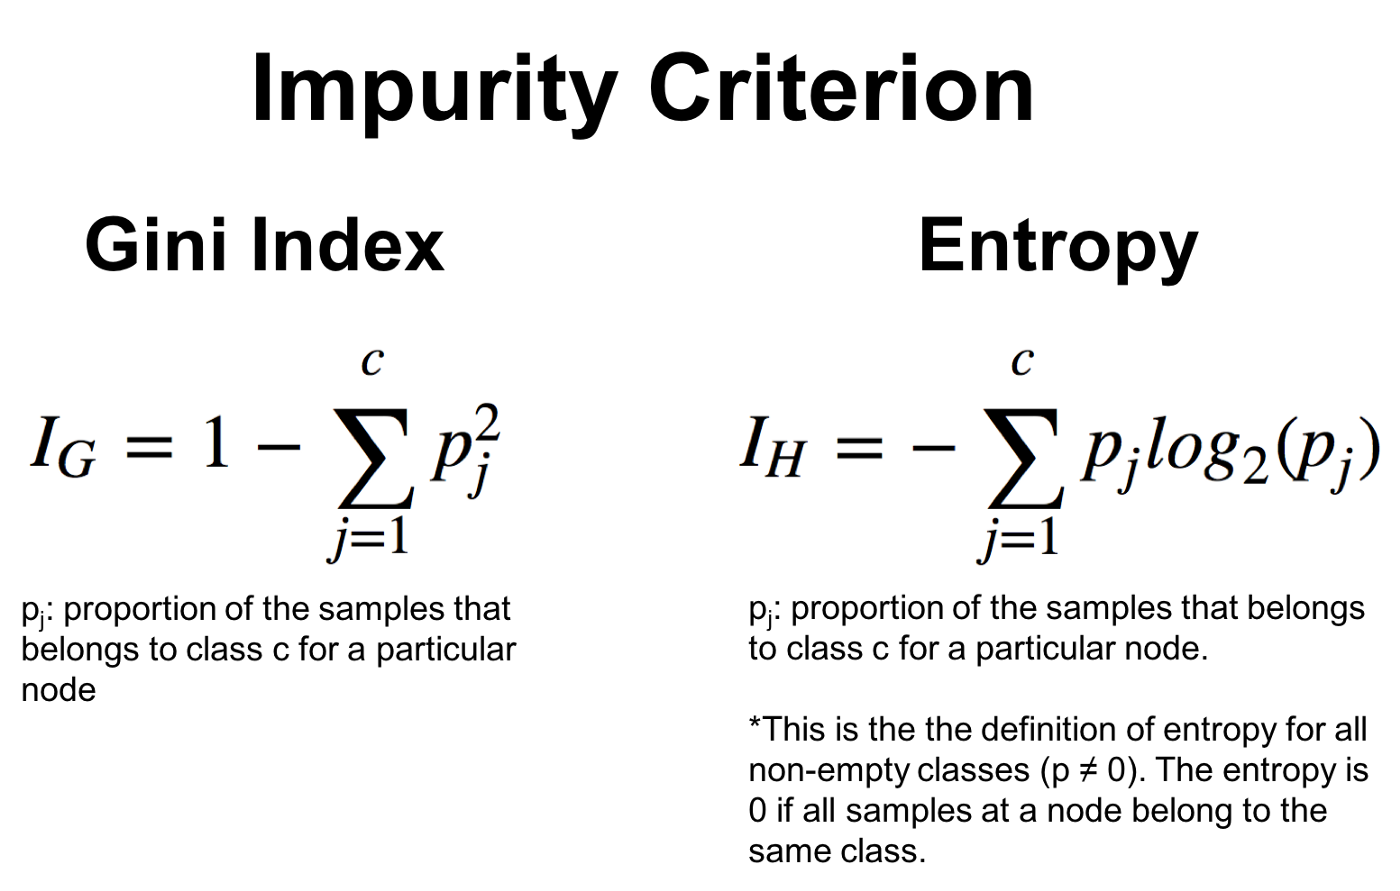

In [ ]:
data = datasets.load_iris()

In [ ]:
y = data["target"]

In [ ]:
target_name = data["target_names"]

In [ ]:
a = np.array(["a","a","a"])
a == "a"

array([ True,  True,  True])

In [ ]:
data

In [ ]:
# Discrete
X = data["data"].copy()

attribute_1 = X[:,0]
attribute_1[attribute_1 < 5] = 0
attribute_1[(attribute_1 >= 5) & (attribute_1 <6.5)] = 1
attribute_1[attribute_1 >=6.5] = 2


attribute_2 = X[:,1]
attribute_2[attribute_2 < 3] = 0
attribute_2[(attribute_2 >= 3) & (attribute_2 <4)] = 1
attribute_2[attribute_2 >=4] = 2


attribute_3 = X[:,2]
attribute_3[attribute_3 < 2.5] = 0
attribute_3[(attribute_3 >= 2.5) & (attribute_3 <5.5)] = 1
attribute_3[attribute_3 >=5.5] = 2


attribute_4 = X[:,3]
attribute_4[attribute_4 < 0.75] = 0
attribute_4[(attribute_4 >= 0.75) & (attribute_4 <1.5)] = 1
attribute_4[attribute_4 >=1.5] = 2




In [ ]:
decision_tree = DecisionTreeClassifier(max_depth = 5)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

In [ ]:
X_train

In [ ]:
decision_tree.fit(X_train,y_train)

X:
[[1. 1. 1. 2.]
 [1. 1. 0. 0.]
 [1. 0. 1. 1.]
 [1. 0. 1. 2.]
 [1. 0. 1. 1.]
 [2. 1. 2. 2.]
 [2. 1. 2. 2.]
 [1. 0. 1. 1.]
 [1. 0. 1. 1.]
 [2. 1. 1. 2.]
 [0. 0. 1. 1.]
 [1. 1. 1. 2.]
 [0. 1. 0. 0.]
 [2. 0. 2. 2.]
 [1. 1. 0. 0.]
 [2. 0. 2. 2.]
 [1. 1. 0. 0.]
 [1. 0. 1. 1.]
 [1. 0. 1. 2.]
 [1. 0. 1. 2.]
 [1. 1. 0. 0.]
 [2. 0. 2. 2.]
 [0. 1. 0. 0.]
 [1. 0. 1. 1.]
 [1. 2. 0. 0.]
 [1. 1. 0. 0.]
 [2. 1. 1. 2.]
 [2. 1. 2. 2.]
 [2. 1. 2. 2.]
 [0. 1. 0. 0.]
 [1. 1. 0. 0.]
 [1. 0. 1. 2.]
 [0. 1. 0. 0.]
 [1. 1. 0. 0.]
 [2. 1. 2. 2.]
 [0. 0. 1. 2.]
 [1. 1. 1. 1.]
 [2. 1. 1. 2.]
 [1. 1. 0. 0.]
 [1. 1. 0. 0.]
 [1. 0. 1. 1.]
 [0. 1. 0. 0.]
 [1. 0. 1. 1.]
 [1. 1. 0. 0.]
 [1. 0. 1. 1.]
 [1. 0. 1. 2.]
 [1. 1. 1. 2.]
 [2. 0. 1. 2.]
 [1. 0. 1. 2.]
 [1. 0. 1. 2.]
 [1. 0. 2. 1.]
 [2. 1. 2. 2.]
 [2. 1. 2. 2.]
 [1. 1. 1. 2.]
 [2. 1. 1. 2.]
 [1. 1. 0. 0.]
 [1. 0. 1. 2.]
 [1. 0. 1. 1.]
 [2. 1. 1. 2.]
 [1. 0. 1. 1.]
 [0. 1. 0. 0.]
 [1. 0. 1. 1.]
 [1. 1. 1. 2.]
 [2. 1. 2. 2.]
 [0. 0. 0. 0.]
 [1. 1. 0. 0.]
 [2. 0.

ValueError: attempt to get argmax of an empty sequence